In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [38]:
data=pd.read_csv("C:/Users/suraj/Desktop/ExcelR/Assignment 13 KNN/glass.csv")

In [39]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [40]:
data['Type'].value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [41]:
data.shape

(214, 10)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [43]:
data.duplicated().sum()

1

In [44]:
data1=data.drop_duplicates()

In [45]:
data1.shape

(213, 10)

In [46]:
X=data1.iloc[:,:9]

In [47]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [48]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [49]:
Y=data1.iloc[:,-1]

In [50]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [51]:
import seaborn as sns

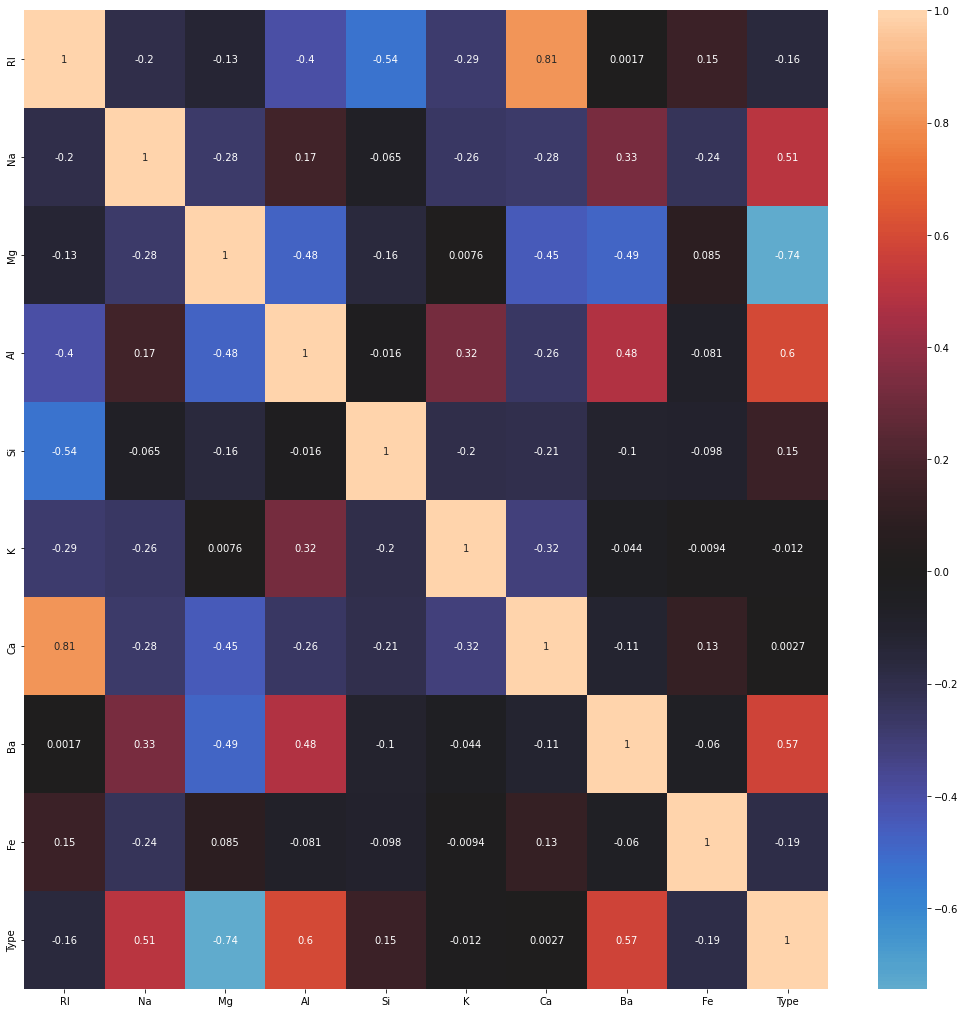

In [69]:
plt.figure(figsize=(18,18))
sns.heatmap(data1.corr(), center=0, annot=True)
plt.show()

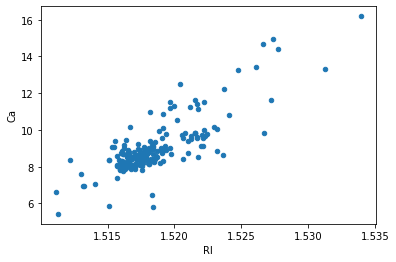

In [54]:
data1.plot(kind="scatter" , x="RI" , y="Ca")
plt.show()

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

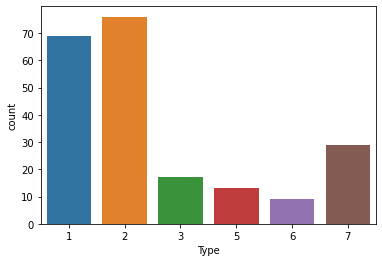

In [67]:
sns.countplot(data1['Type'],label='Count')

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=45, random_state=40)

In [57]:
KNN = KNeighborsClassifier(n_neighbors=4)

In [58]:
KNN.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=4)

In [72]:
neighbors=[]
cv_scores=[]

for k in range(1,51,2):
    neighbors.append(k)
    knn= KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(
        knn, X_train,Y_train, cv=10 , scoring='accuracy')
    cv_scores.append(scores.mean())
    
scores = cross_val_score(knn, X , Y , cv=10 , scoring='accuracy')
print(scores)

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\suraj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\suraj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\suraj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\suraj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\suraj\anaconda3\

[0.40909091 0.72727273 0.5        0.38095238 0.52380952 0.76190476
 0.76190476 0.52380952 0.61904762 0.52380952]


C:\Users\suraj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\suraj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


the optimal number of k neighbors = 1


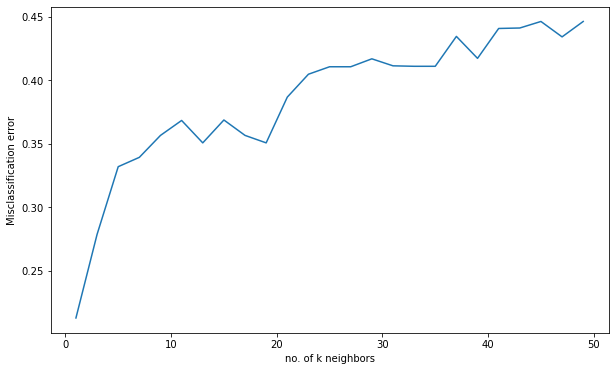

In [73]:
MSE=[1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print('the optimal number of k neighbors = %d' %optimal_k)

plt.figure(figsize=(10,6))
plt.plot(neighbors, MSE)
plt.xlabel('no. of k neighbors')
plt.ylabel('Misclassification error')
plt.show()

In [74]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [75]:
KNN.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=1)

In [76]:
Y_pred=KNN.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.41      0.54      0.47        13
           2       0.85      0.58      0.69        19
           3       0.20      0.25      0.22         4
           5       0.50      1.00      0.67         1
           6       0.67      0.67      0.67         3
           7       0.80      0.80      0.80         5

    accuracy                           0.58        45
   macro avg       0.57      0.64      0.58        45
weighted avg       0.64      0.58      0.59        45



In [80]:
from sklearn.metrics import accuracy_score
print(' accuracy =' ,accuracy_score(Y_pred, Y_test)*100)

 accuracy = 57.77777777777777


Text(91.68, 0.5, 'predicted score')

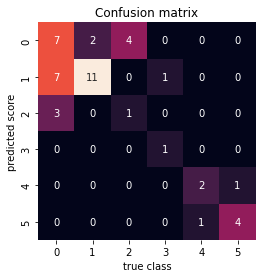

In [81]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true class')
plt.ylabel('predicted score')

In [82]:
#prediction
z=KNN.predict(X)

In [83]:
z.tolist()

[1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7]

In [84]:
y_pred= pd.DataFrame({'actual': Y,
                         'predicted': z.tolist()})
y_pred

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
209,7,7
210,7,7
211,7,7
212,7,7
